,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Resized Image
0,bob-brewer.jpg,RGB,JPEG,3,1.340000,106,150,D:\monkeys\bob-brewer.jpg,
1,carlos-cram.jpg,RGB,JPEG,3,2.450000,150,100,D:\monkeys\carlos-cram.jpg,
2,chris-charles.jpg,RGB,JPEG,3,2.220000,129,150,D:\monkeys\chris-charles.jpg,
3,chris-curry.jpg,RGB,JPEG,3,3.450000,120,150,D:\monkeys\chris-curry.jpg,
4,derrick-brooks.jpg,RGB,JPEG,3,1.800000,107,150,D:\monkeys\derrick-brooks.jpg,
5,jamie-haughton.jpg,RGB,JPEG,3,4.450000,150,99,D:\monkeys\jamie-haughton.jpg,
6,joshua-j-cotten.jpg,RGB,JPEG,3,1.240000,150,113,D:\monkeys\joshua-j-cotten.jpg,
7,kelly-sikkema.jpg,RGB,JPEG,3,1.530000,150,99,D:\monkeys\kelly-sikkema.jpg,
8,leila-boujnane.jpg,RGB,JPEG,3,3.520000,150,150,D:\monkeys\leila-boujnane.jpg,
9,pranesh-ravi.jpg,RGB,JPEG,3,7.390000,150,100,D:\monkeys\pranesh-ravi.jpg,

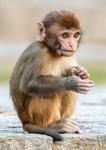
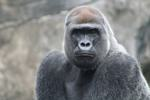
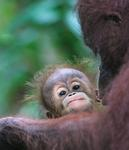
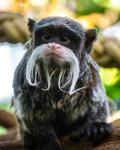
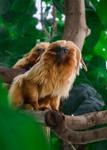
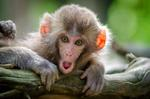
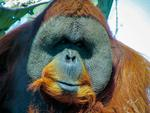
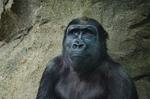
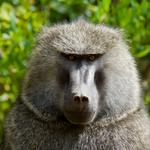
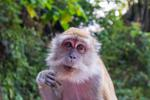
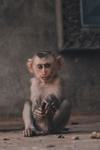
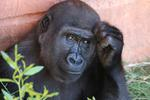
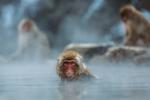
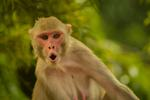
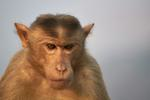

In [1]:
import os
import glob
import base64
from PIL import Image
import pandas as pd
from IPython.display import display, HTML
from io import BytesIO

pd.set_option('display.max_colwidth', None)

def get_thumbnail(path):
    i = Image.open(path)
    i.thumbnail((150, 150), Image.LANCZOS)
    return i

def image_base64(im):
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}" style="max-height:150px;">'

def process_images(folder_path):
    image_data = []

    for filename in glob.glob(os.path.join(folder_path, '*.jpg')):
        try:
            img = get_thumbnail(filename)

            img_info = {
                'File Name': os.path.basename(filename),
                'Color Model': img.mode,
                'Format': img.format,
                'Channels': len(img.getbands()),
                'File Size (MB)': round(os.path.getsize(filename) / (1024 * 1024), 2),
                'Width': img.width,
                'Height': img.height,
                'Full Path': filename,
                'Resized Image': img
            }

            image_data.append(img_info)
        except Exception as e:
            print(f"Ignoring non-image file: {filename}")

    image_df = pd.DataFrame(image_data)

    return image_df

def display_images(image_df):
    styles = [
        dict(selector="img", props=[("max-height", "150px")]),
        dict(selector="th, td", props=[("padding", "8px")])
    ]

    styled_df = image_df.style.set_table_styles(styles).format({'Resized Image': image_formatter})
    display(styled_df)

folder_path = 'D:\\monkeys\\'
result_df = process_images(folder_path)

display_images(result_df)

In [2]:
import os
import random
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

def apply_random_filter(image):
    filter_type = random.choice(['red', 'green', 'blue', 'yellow', 'purple', 'cyan', 'none'])
    
    if filter_type == 'none':
        return image
    
    filter_image = image.convert('RGBA')
    r, g, b, a = filter_image.split()
    
    if filter_type == 'red':
        filter_image = Image.merge('RGBA', (r, Image.new('L', g.size, 0), Image.new('L', b.size, 0), a))
    elif filter_type == 'green':
        filter_image = Image.merge('RGBA', (Image.new('L', r.size, 0), g, Image.new('L', b.size, 0), a))
    elif filter_type == 'blue':
        filter_image = Image.merge('RGBA', (Image.new('L', r.size, 0), Image.new('L', g.size, 0), b, a))
    elif filter_type == 'yellow':
        filter_image = Image.merge('RGBA', (r, g, Image.new('L', b.size, 0), a))
    elif filter_type == 'purple':
        filter_image = Image.merge('RGBA', (r, Image.new('L', g.size, 0), b, a))
    elif filter_type == 'cyan':
        filter_image = Image.merge('RGBA', (Image.new('L', r.size, 0), g, b, a))
    
    return filter_image

def create_poster(input_folder, output_name, columns, rows):
    image_files = [file for file in os.listdir(input_folder) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    selected_images = random.sample(image_files, columns * rows)

    poster_width = columns * 500
    poster_height = rows * 500
    poster = Image.new('RGB', (poster_width, poster_height))

    for i in range(rows):
        for j in range(columns):
            image_path = os.path.join(input_folder, selected_images[i * columns + j])
            original_image = Image.open(image_path)

            # Обрізаємо та змінюємо розмір картинки
            size = min(original_image.size)
            left = (original_image.width - size) // 2
            top = (original_image.height - size) // 2
            cropped_image = original_image.crop((left, top, left + size, top + size))
            resized_image = cropped_image.resize((500, 500))

            # Застосовуємо випадковий кольоровий фільтр
            filtered_image = apply_random_filter(resized_image)

            poster.paste(filtered_image, (j * 500, i * 500))

    poster.save(output_name, 'PNG')
    return poster

def display_image(image):
    plt.imshow(image)
    plt.axis('off')  # Відключаємо вісі координат
    plt.show()

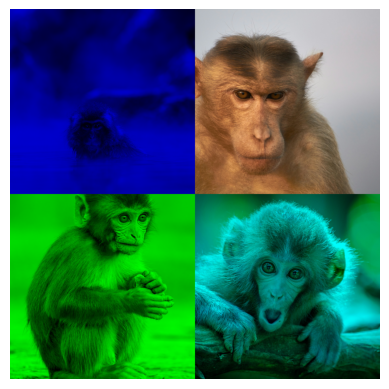

In [3]:
input_folder = 'D:\\monkeys\\'
output_name = 'poster1.png'
columns = 2
rows = 2
poster = create_poster(input_folder, output_name, columns, rows)
display_image(poster)

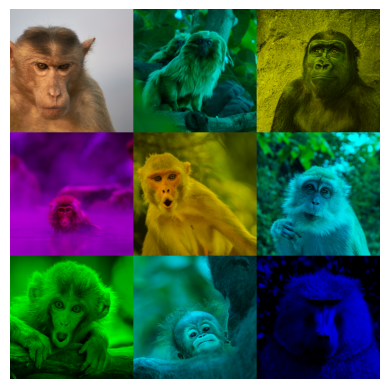

In [4]:
input_folder = 'D:\\monkeys\\'
output_name = 'poster2.png'
columns = 3
rows = 3
poster = create_poster(input_folder, output_name, columns, rows)
display_image(poster)

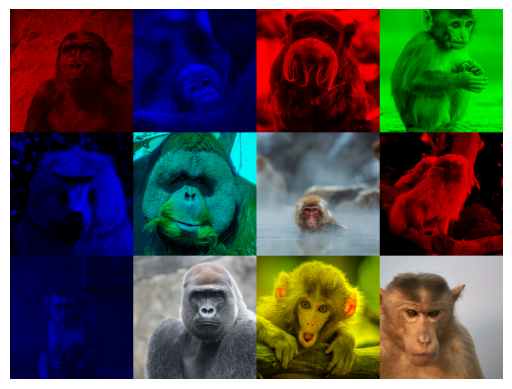

In [5]:
input_folder = 'D:\\monkeys\\'
output_name = 'poster1.png'
columns = 4
rows = 3
poster = create_poster(input_folder, output_name, columns, rows)
display_image(poster)